<a href="https://colab.research.google.com/github/whgustj00/MyFile/blob/main/%EC%A0%95%EB%B3%B4%EB%B6%84%EC%84%9D_%ED%86%B5%EC%8B%A0%EC%82%AC%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 패키지 설치

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
plt.rcParams['figure.dpi'] = 100

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 한글 폰트로 변경
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')


In [ ]:
import chardet

# 파일의 인코딩 감지
with open('dataset.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)

# 감지된 인코딩을 사용하여 파일 읽기
df = pd.read_csv("dataset.csv", encoding=result['encoding'])

# 데이터 샘플 확인
df.head()


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


,구분별(1),구분별(2),2021,2021.1,2021.2,2021.3,2021.4,2022,2022.1,2022.2,2022.3,2022.4,2023,2023.1,2023.2,2023.3,2023.4
0,구분별(1),구분별(2),응답자수 (명),SKT (%),KT(구KTF) (%),LGU+(구LGT) (%),알뜰폰서비스(MVNO) (%),응답자수 (명),SKT (%),KT(구KTF) (%),LGU+(구LGT) (%),알뜰폰서비스(MVNO) (%),응답자수 (명),SKT (%),KT(구KTF) (%),LGU+(구LGT) (%),알뜰폰서비스(MVNO) (%)
1,전체,소계,9421.3,46.8,26.6,25.2,1.4,9360.5,46.6,25.8,24.7,2.8,9246.8,47.5,26.3,22.7,3.5
2,성별,남,4784.3,48.1,26.6,24.0,1.3,4724.9,48.4,25.7,22.9,3.0,4673.9,49.3,25.7,21.6,3.5
3,성별,여,4637.0,45.4,26.7,26.4,1.5,4635.6,44.8,26.0,26.5,2.7,4572.9,45.7,27.0,23.8,3.5
4,연령,만10대미만,108.7,41.1,25.0,17.9,16.0,100.1,31.8,27.2,22.1,18.9,97.1,35.2,22.2,8.4,34.3


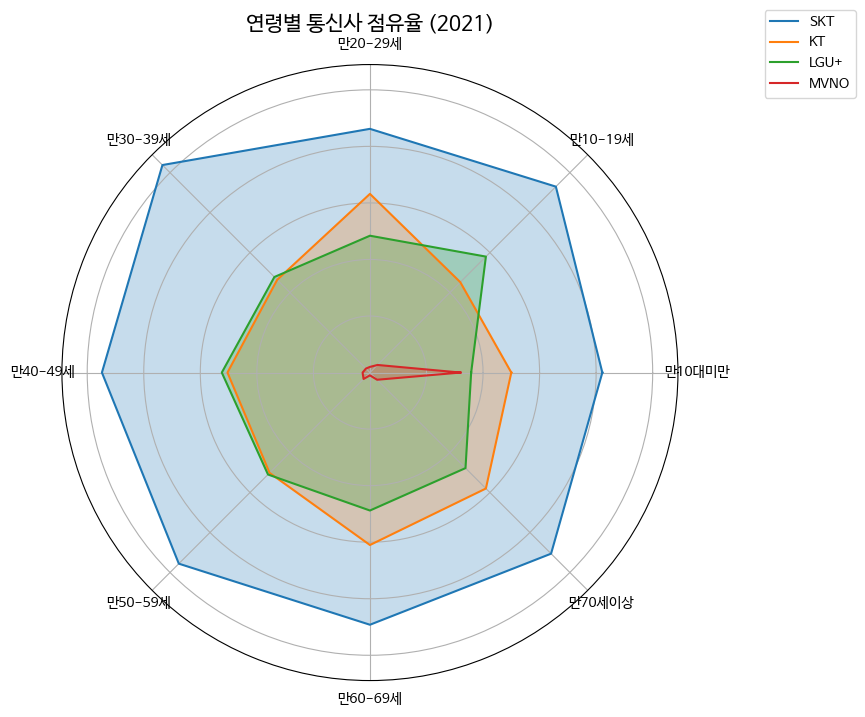

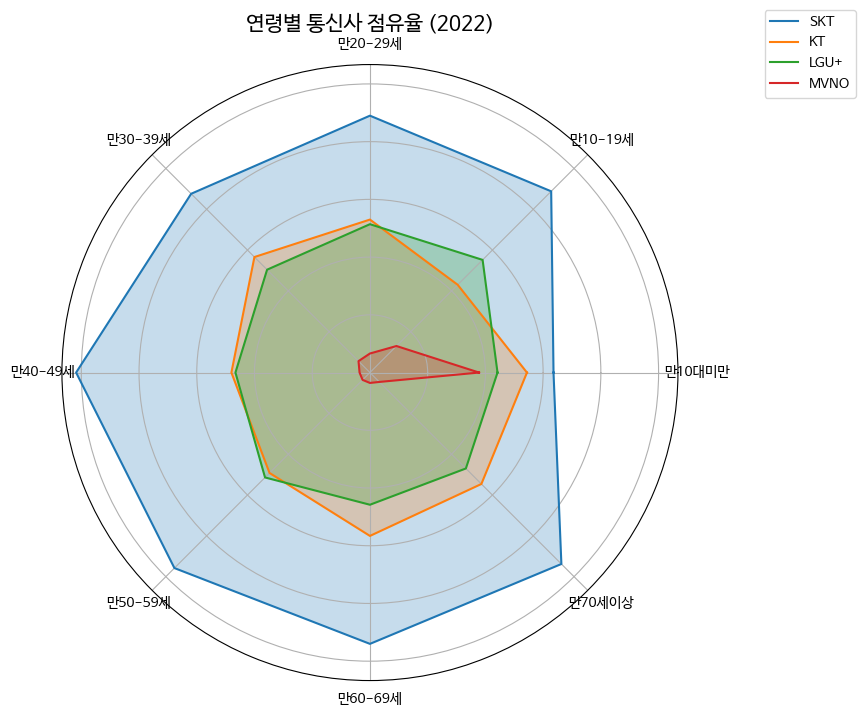

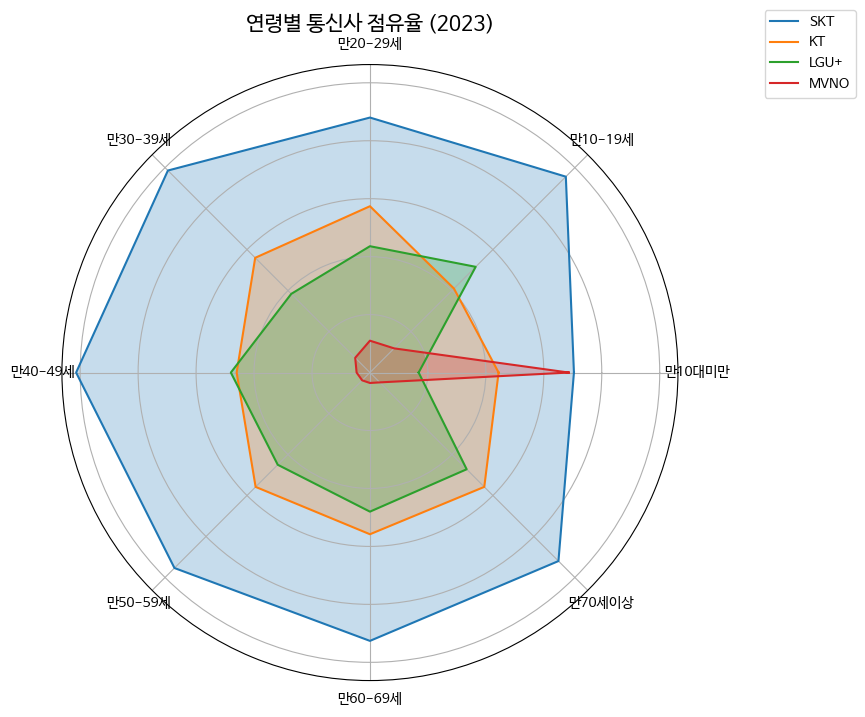

In [ ]:
# 연령별 통신사 점유율 데이터 추출 함수
def extract_age_data(year):
    age_data = df[df['구분별(1)'] == '연령'].dropna(subset=['구분별(2)'])
    age_data = age_data[['구분별(2)', f'{year}.1', f'{year}.2', f'{year}.3', f'{year}.4']].rename(columns={
        '구분별(2)': 'Age Group',
        f'{year}.1': 'SKT',
        f'{year}.2': 'KT',
        f'{year}.3': 'LGU+',
        f'{year}.4': 'MVNO'
    })
    age_data.iloc[:, 1:] = age_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    return age_data

# 2021년, 2022년, 2023년 데이터 추출
age_data_2021 = extract_age_data(2021)
age_data_2022 = extract_age_data(2022)
age_data_2023 = extract_age_data(2023)

# 방사형 차트를 위한 설정
labels = age_data_2021['Age Group'].values
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# 방사형 차트 그리기 함수
def plot_radar_chart(data, title):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, carrier in enumerate(data.columns[1:]):
        values = data[carrier].values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=carrier)
        ax.fill(angles, values, alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, size=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 2021년 방사형 차트
plot_radar_chart(age_data_2021, '연령별 통신사 점유율 (2021)')
plt.show()

# 2022년 방사형 차트
plot_radar_chart(age_data_2022, '연령별 통신사 점유율 (2022)')
plt.show()

# 2023년 방사형 차트
plot_radar_chart(age_data_2023, '연령별 통신사 점유율 (2023)')
plt.show()

연령별 통신사 점유율 그래프

모든 연도, 연령대에서 SKT가 가장 높았으며 KT와 LG U+가 뒤를 이어가고 있다.

만 10대 미만 연령에서 알뜰폰 이용자 수가 증가한다는 것을 알 수 있다.

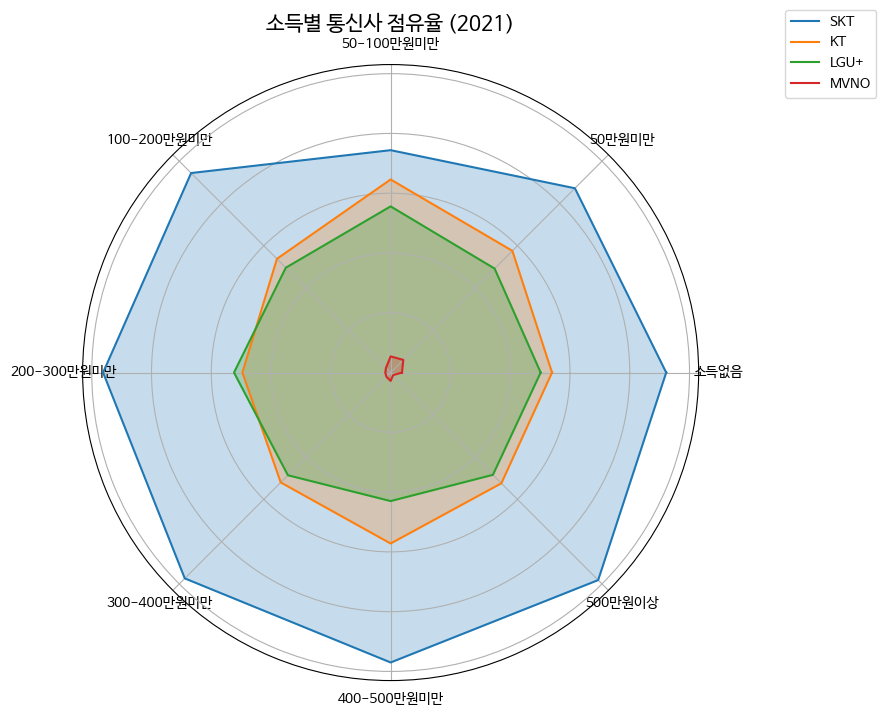

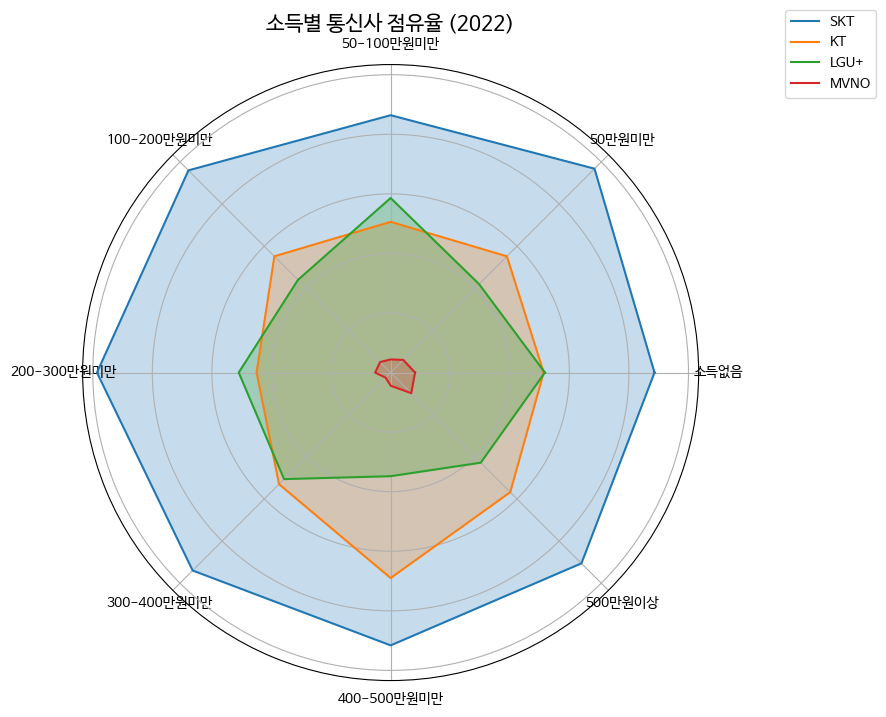

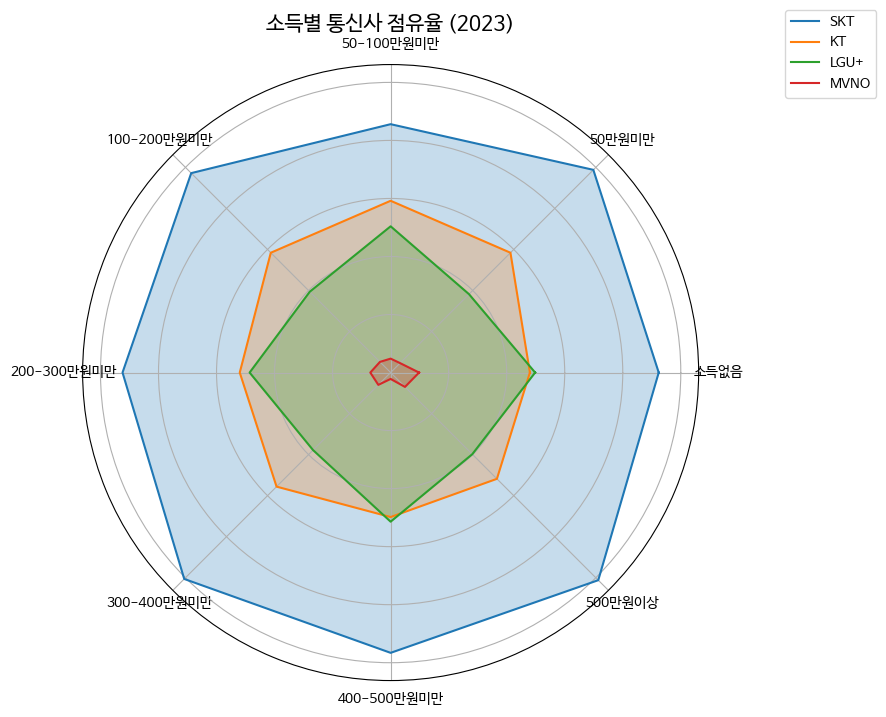

In [ ]:
# 소득별 통신사 점유율 데이터 추출 함수
def extract_income_data(year):
    income_data = df[df['구분별(1)'] == '월평균소득'].dropna(subset=['구분별(2)'])
    income_data = income_data[['구분별(2)', f'{year}.1', f'{year}.2', f'{year}.3', f'{year}.4']].rename(columns={
        '구분별(2)': 'Income Group',
        f'{year}.1': 'SKT',
        f'{year}.2': 'KT',
        f'{year}.3': 'LGU+',
        f'{year}.4': 'MVNO'
    })
    income_data.iloc[:, 1:] = income_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    return income_data

# 2021년, 2022년, 2023년 데이터 추출
income_data_2021 = extract_income_data(2021)
income_data_2022 = extract_income_data(2022)
income_data_2023 = extract_income_data(2023)

# 방사형 차트를 위한 설정
labels = income_data_2021['Income Group'].values
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# 방사형 차트 그리기 함수
def plot_radar_chart(data, title):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, carrier in enumerate(data.columns[1:]):
        values = data[carrier].values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=carrier)
        ax.fill(angles, values, alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, size=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 2021년 방사형 차트
plot_radar_chart(income_data_2021, '소득별 통신사 점유율 (2021)')
plt.show()

# 2022년 방사형 차트
plot_radar_chart(income_data_2022, '소득별 통신사 점유율 (2022)')
plt.show()

# 2023년 방사형 차트
plot_radar_chart(income_data_2023, '소득별 통신사 점유율 (2023)')
plt.show()